![Logo](Technikklein.png)

# Task 11: Decision Trees
### Data Science


##### Dozent: Prof. Dr. Stefan Edlich
##### Medieninformatik
##### Hochschule Emden/Leer
##### Sommersemester 2021
   
_____


### Exercise
A) Find some data here [1] on people. The goal is to decide if someone buys a computer or not. Derive the best decision tree by calculating a little by hand (Shannon). At least the first split.

B) Compare your tree against the tree derived from SciKit Learn as given in the Python example before! Why are they different? Print the tree with Graphviz (can be easily done with WebGraphViz [2])

If you run into trouble with encoding, you can also find another dataset which is easier to handle.


#### I am going to use the Titanic Test Dataset (from https://www.kaggle.com/c/titanic/overview) to predict if a person would have survived again, since the given data seems to need a lot of work to get it to run.
#### We are going to load the training set first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats
from sklearn.model_selection import train_test_split

data = pd.read_csv("train.csv")

df = pd.DataFrame(data)

print (df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### We are dropping NaNs and String columns to leave a dataset more similar to the one offered in the exercise.

In [3]:
smalldf = df.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
smalldf = smalldf.dropna()
smalldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 33.5+ KB


#### Now, we are going to count how many passengers survived and how many didn't.

In [4]:
smalldf.value_counts(subset='Survived')

Survived
0    424
1    290
dtype: int64

In [5]:
smalldf.value_counts(subset='Survived', normalize=True)

Survived
0    0.593838
1    0.406162
dtype: float64

#### Now we can calculate the entropy of the survival.

Entropy(Survival)
= Entropy(424, 290)
= Entropy(0.59, 0.41)
= -(0.59 log2 0.59) - (0.41 log2 0.41)
= 0.45 + 0.53
= 0.98

#### Then we calculate the Entropy for the combinations.

In [6]:
smalldf.value_counts(subset='Sex')

Sex
male      453
female    261
dtype: int64

In [7]:
femaledf = smalldf.loc[smalldf.Sex == "female"]
femaledf.value_counts(subset='Survived', normalize=True)

Survived
1    0.754789
0    0.245211
dtype: float64

In [8]:
maledf = smalldf.loc[smalldf.Sex == "male"]
maledf.value_counts(subset='Survived', normalize=True)

Survived
0    0.794702
1    0.205298
dtype: float64

#### E(Survival, Sex)
= P(female) * E(0.75, 0.25) + P(male) * E(0.79, 0,21)
= (261/714) * 0.815 + (453/714) * 0.749
= 0.77
#### G(Survival, Sex)
= E(Survival) - E(Survival, Sex)
= 0.98 - 0.77
= 0.21

In [9]:
smalldf.value_counts(subset='Pclass')

Pclass
3    355
1    186
2    173
dtype: int64

In [10]:
class1df = smalldf.loc[smalldf.Pclass == 1]
class1df.value_counts(subset='Survived', normalize=True)

Survived
1    0.655914
0    0.344086
dtype: float64

In [11]:
class2df = smalldf.loc[smalldf.Pclass == 2]
class2df.value_counts(subset='Survived', normalize=True)

Survived
0    0.520231
1    0.479769
dtype: float64

In [12]:
class3df = smalldf.loc[smalldf.Pclass == 3]
class3df.value_counts(subset='Survived', normalize=True)

Survived
0    0.760563
1    0.239437
dtype: float64

#### E(Survival, Pclass)
= P(Class1) * E(0.66, 0.34) + P(Class2) * E(0.52, 0.47) + P(Class3) * E(0.76, 0.24)
= (186/714) * 0.92 + (173/714) * 1 + (355/714) * 0.8
= 0.24 + 0.24 + 0.4
= 0.88
#### G(Survival, Pclass)
= E(Survival) - E(Survival, Pclass)
= 0.98 - 0.88
= 0.1

In [13]:
smalldf.loc[smalldf.Age < 100, "Age2"] = "Old"
smalldf.loc[smalldf.Age < 50, "Age2"] = "Middle-Aged"
smalldf.loc[smalldf.Age < 30, "Age2"] = "Young"

smalldf.value_counts(subset='Age2')

Age2
Young          384
Middle-Aged    256
Old             74
dtype: int64

In [14]:
ydf = smalldf.loc[smalldf.Age2 == "Young"]
ydf.value_counts(subset='Survived', normalize=True)

Survived
0    0.59375
1    0.40625
dtype: float64

In [15]:
mdf = smalldf.loc[smalldf.Age2 == "Middle-Aged"]
mdf.value_counts(subset='Survived', normalize=True)

Survived
0    0.582031
1    0.417969
dtype: float64

In [16]:
odf = smalldf.loc[smalldf.Age2 == "Old"]
odf.value_counts(subset='Survived', normalize=True)

Survived
0    0.635135
1    0.364865
dtype: float64

#### E(Survival, Age)
= P(Young) * E(0.59, 0.41) + P(Middle-Aged) * E(0.58, 0.42) + P(Old) * E(0.64, 0.36)
= (384/741) * 0,98 + (256/714) * 0.98 + (74/714) * 0.94
= 0.53 + 0.35 + 0.1 = 0.98
#### G(Survival, Age)
= E(Survival) - E(Survival, Age)
= 0.98 - 0.98
= 0

In [17]:
smalldf.value_counts(subset='SibSp')

SibSp
0    471
1    183
2     25
4     18
3     12
5      5
dtype: int64

In [18]:
smalldf.loc[smalldf.SibSp == 0, "SibSp2"] = "None"
smalldf.loc[smalldf.SibSp == 1, "SibSp2"] = "One"
smalldf.loc[smalldf.SibSp > 1, "SibSp2"] = "More"

smalldf.value_counts(subset='SibSp2')

SibSp2
None    471
One     183
More     60
dtype: int64

In [19]:
noSibSpdf = smalldf.loc[smalldf.SibSp2 == "None"]
noSibSpdf.value_counts(subset='Survived', normalize=True)

Survived
0    0.62845
1    0.37155
dtype: float64

In [20]:
oneSibSpdf = smalldf.loc[smalldf.SibSp2 == "One"]
oneSibSpdf.value_counts(subset='Survived', normalize=True)

Survived
1    0.530055
0    0.469945
dtype: float64

In [21]:
moreSibSpdf = smalldf.loc[smalldf.SibSp2 == "More"]
moreSibSpdf.value_counts(subset='Survived', normalize=True)

Survived
0    0.7
1    0.3
dtype: float64

#### E(Survival, SiblingsAndSpouses)
= P(NoSiblingsOrSpouses) * E(0.63, 0.37) + P(OneSiblingOrSpouse) * E(0.53, 0.47) + P(MoreThanOneSiblingOrSpouse) * E(0.7 0.3)
= (471/714) * 0.95 + (183/714) * 1 + (60/714) * 0.88
= 0.63 + 0.26 + 0.07 = 0.96
#### G(Survival, SiblingsAndSpouses)
= E(Survival) - E(Survival, SiblingsAndSpouses)
= 0.98 - 0.96
= 0.02

#### The attribute with the biggest gain is Sex, so this would be the first split. If we stop here, our tree would ask: Are you a female? If yes: You will survive.

#### Now for the Graphviz tree.

In [34]:
from sklearn import tree

survivaldata = smalldf.Survived
trainingdata = smalldf.drop(['Survived', 'Age2', 'SibSp2'], axis=1) #drop target column and my maths columns
trainingdata['Sex'] = np.where((trainingdata['Sex'] == "male"), 1, 0) #convert sex to integer values

X = trainingdata
y = survivaldata
 
tree_clf = tree.DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(167.4, 181.2, 'X[1] <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(83.7, 108.72, 'X[0] <= 2.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(41.85, 36.23999999999998, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(292.95, 36.23999999999998, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]')]

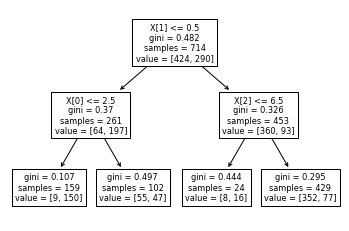

In [35]:
tree.plot_tree(tree_clf)

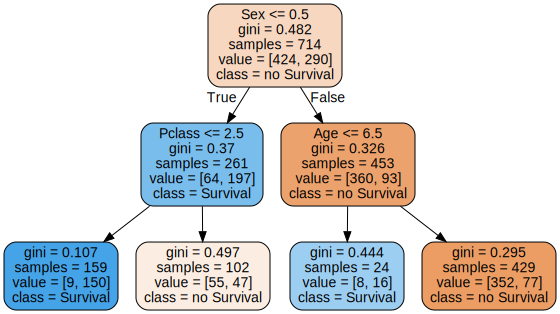

In [36]:
import graphviz

class_names = ["no Survival", "Survival"]

dotdata = tree.export_graphviz(tree_clf,
                          feature_names=trainingdata.columns,
                          class_names=class_names,
                          rounded=True,
                          filled=True
)

graph = graphviz.Source(dotdata)
graph

#### The Graphviz Tree also picked Sex as the first attribute in the tree and it also indicates, that if you are a woman you might survive.
#### Since SciKit-Learn splits the tree binarily every time, the overall result for the tree would differ from the one I would have calculated by hand. My PassengerClass and Age and SiblingsAndSpouses attribute are all three-way attributes, that would be exressed binarily in SciKit. Nonetheless, SciKit-Learn can manage the floating values of Age and SiblingsAndSpouses much better than my three-way classification system, which I added because I was too lazy to calculate the entropy for all the different values. :)